# Training Linear Models

So far we have treated ML models and their training algos mostly like black boxes. If you wen through some of the exercises in the previous chapters, you may have been surprised by how much you can get done without knowing anything about what's under the hood: you optimized a regression system, you improved a digt image classifier, and you even built a spam classifier from scratch -- all this without knowing how they actually work. Indeed, in many situations you don't really need to know the implementation details.

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what's under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding building and training neural networks.

In this chapter, we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

- Using a direct 'closed-form' equation that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimize the cost function over the training set). 
- Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we will use again and again when we study neural networks: Batch GD, Mini-batch GD and Stochastic GD.

Next we will look at Polynomial Regression, a more complex model that can fit non-linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case, using learning curves, and then we will look at several regularization techniques that can reduce the risk of overfitting the training set.

GFinally we will look at two more models that are commonly used for classification tasks: Logistic Regression and Softmax Regression.

## Linear Regression

Generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

$$ \hat{y} = \theta_0 + \theta_1x_1+ \theta_2x_2 + ... + \theta_nx_n$$

This can be written much more concisely using a vectorized form:

$$ \hat{y} = h_\theta(x) = \theta \cdot x $$

- $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- x is the instance's *feature vector* containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta \cdot x$ is the dot product of the vectors $\theta$ and x.
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$.


**Note:**

In ML, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\theta$ and x are column vectors, then the prediction is $\hat{y} = \theta^T x$, where $\theta^T$ is the *transpose* of $\theta$ (a row vector instead of a column vector) and $\theta^T x$ is the matrix multiplication of $\theta^T$ and x.

Okay, that's the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. In chapter 2 we saw that the most common performance measure of a regression model is the RMSE. Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RSME. In practice, it is simple to minimize the MSE than the RMSE, and it leads to the same result.

The MSE of a linear regression hypothesis $h_\theta$ on a training set X is calculated using this equation:

$$ MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$$

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - in other words, a mathematical equation that gives the result directly. This is called the *Normal Equation*:

$$ \hat{\theta} = (X^TX)^{-1}X^Ty$$
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- y is the vector of target values containing $y^{(1)} to y^{(m)}$

Let's generate some linear-looking data to test this equation

In [84]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

Now let's compute $\hat{\theta}$ using the Normal Equation. We will use the inv() function from Numpy's Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [85]:
X_b = np.c_[np.ones((100, 1)),X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x$ + Gaussian noise.

Let's see waht the equation found:

In [86]:
theta_best

array([[4.50161758],
       [2.9987789 ]])

We would have hoped for $\theta_0$ = 4 and $\theta_1$ = 3. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

Now you can make predictions using $\hat{\theta_0}$:

In [87]:
X_new = np.array([[0],[2]]) # column vector
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.50161758],
       [10.49917539]])

Let's plot this model's predictions

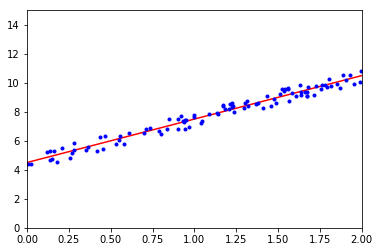

In [88]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-") 
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15]) # x axis from 0 to 2; y axis from 0 to 15
plt.show()

Performing linear regression using Scikit-Learn is quite simple (Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.50161758] [[2.9987789]]


array([[ 4.50161758],
       [10.49917539]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [90]:
theta_best_svd, redisualds, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.50161758],
       [2.9987789 ]])

This function computes $\hat{\theta} = X^+y$, where $X^+$ is the *pseudoinverse* of X (specifically the Moore-Penrose inverse). You can use the np.linalg.pinv() to compute the pseudoinverse directly:

In [91]:
np.linalg.pinv(X_b).dot(y)

array([[4.50161758],
       [2.9987789 ]])

In [92]:
X_b.shape

(100, 2)

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrixes U $\Sigma$ $V^T$. 

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed the Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e. singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

### Computational Complexity

The Normal Equation computes the inverse of $X^TX$ which is an (n + 1) x (n + 1) matrix (where n is the number of features). The *computational complexity* of inverting such a matrix is typically about O($n^{2.4}$) to O($n^{3}$) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4}$ = 5.3 to $2^{3}$ = 8.

The SVD approach used by Scikit-Learn's LinearRegression class is about O($n^2$). If you double the number of features, you multiply the computation time by roughly 4.

**Caution:**

Both the Normal equation and the SVD approach get very slow when the number of features grows large (e.g. 100,000). On the positive side, both are linear with regards to the number of instances in the training set (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.

Also, once you have trained your Linear Regression model, **predictions** are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit in memory.

## Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog: you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameters vector $\theta$, and it goes in the direction of the descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling $\theta$ with random values (this is called *random initialization*), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g. the MSE), until the algorithm *converges* to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

On the other hand, if the learning rate is too high, you might jumpo **across** the vally and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverse, with larger and larger values, failing to find a good solution.

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateau, and all sorts of irregular terrains, making convergence to the minimum very difficult.

Fortunately, the MSE cost function for a Linear Regression model happens to be a *convex function*, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one **global minimum**. It is also a continuous function with a slope that never changes abruptly (its derivative is Lipschitz continuous). These two facts have a great consequence: Gradient Descent is **guaranteed** to approach arbitrarily close the gobal minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. In this case the algo will take more time to reach the minimum.

**Caution**:

When using Gradient Descent, you should ensure that all features have a similar scale (e.g. using Scikit-Learn's StandardScaler class), or else it will take much longer to converge

Training a model means searching for a combination of model parameters that minimize a cost function (over the training set). It is a search in the model's *parameter space*: the more parameters a model has, the more dimensions this space has, and the harde the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost funcion is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.

### Batch Gradient Descent

To implement GD, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change i fyou change $\theta_j$ just a little bit. This is called a *partial derivative*. It is like asking "what is the slope of the mountain under my feet if I face east?" and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions).

This equations computes the partial derivative of the cost function with regards to parameters $\theta_j$, 

noted $\frac{\partial}{\partial\theta_j}$MSE($\theta$):

$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)})x^{(i)}_j$$

Instead of computing these partial derivatives individually, we can use the following equation to compute them all in one go. The gradient vector, noted $\nabla_\theta MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).
$$\nabla_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$$

**Caution**:

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called *Batch Gradient Descent*: it uses the whole batch of training data at every step (actually, *Full Gradient Descent* would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster GD algorithms shortly). However, GD scales well with the number of features: training a Lin Reg model when there are hundreds of thousands of features is much faster using GD than using the Normal Equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the oposite direction to go downhill. This means subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step.

$\theta^{(next step)} = \theta - \eta\nabla_\theta MSE(\theta)$

Let's look at a quick implementation of this algorithm:

In [93]:
%%time
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
%time
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

Wall time: 0 ns
[[4.50161758]
 [2.9987789 ]]
Wall time: 7.99 ms


That's what the Normal Equation found! GD worked perfectly. But what if you used a different learning rate eta?

To gind a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may waonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny -- that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the *tolerance*) -- because this happens when GD has (almost) reached the minimum.

**CONVERGENCE RATE**

When the cost function is convex and its slope does not change abruptly (as the case for the MSE cost function), Batch GD with a fixed learning rate will eventually converge to the optimal solution, but you mau have to wait a while: it an take O(1/$\epsilon$) iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based on on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algo).

On the other hand, due to its stochastic (i.e. random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decresing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algo stops, the final parameter values are good, but not optimal.

When the cost function is very irregular, this can actually help the algo jump out of local minima, so Stochastic Gradient Descent has a better find of finding the global minimum than BGD does.

Therefore randomness is good to escape from local optima, but bad because it means that the algo can never settle at the minumum. One solution to this  dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algo to settle at the global minimum. This process is akin to *simulated annealing* an algo inspired from the process of annealing in metallurgy when molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the *learning schedule*. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfawy to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.
This code implements Stochastic Gradient Descent using a simple learning schedule:

By convention we iterate by rounds of m iterations; each round is called an epoch. While the BGD code iterated 1000 times through the whole training set, this code goes trhough the training set only 50 times and reaches a fairly good solution.

In [94]:
%%time

n_epochs = 50
t0, t1 = 5, 10 # learning schedule hyperparameters
m = 100 # number of observations
def learning_schedule(t):
    t0, t1 = 5, 10 # learning schedule hyperparameters -- inside function bc bug w/ ipython
    return t0 / (t +t1)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs): # for each epoch
    for i in range(m): # pick a random istances m = 100 times
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1] # second index is needed to get a 1-row, 2-cols matrix
        yi = y[random_index:random_index + 1] # instead of a 2-long vector
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # compute vector
        eta = learning_schedule(epoch * m + i) # get learning rate
        theta = theta - eta * gradients # update theta
print(theta)

[[4.51440765]
 [3.00143808]]
Wall time: 54 ms


Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at atll. If you want to be sure that the algo goes through every instance each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it by instance, the nshuffle it again, and so on. However, this generally converges more slowly.

**Caution**:

When using SGD, the training instances must be independent and identically distribuited (IID), to ensure that the parameters get pulled towards the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g. pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example, if the instances are sorted by lable, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1000 epochs (max_iter = 1000) or until the loss drops by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty = None; more details on this shortly):



In [96]:
%%time

from sklearn.linear_model import SGDRegressor
sgd_re = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_re.fit(X, y.ravel()) # ravel() Return a contiguous flattened array. y is a column vector --> row vector
print(sgd_re.intercept_, sgd_re.coef_)

[4.47355203] [3.01012944]
Wall time: 3 ms


### Mini-batch Gradient Descent

The last GD algo we will look at is called *Mini-batch Gradient Descent*. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called *mini-batches*. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algo's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Lin Reg as we saw earlier).

Let's compare the algorithms we've discussed so far for Linear Regression (Normal Equation can only perform Lin Reg, the GD algos can be used to train many other models). Recall that m is the number of training instances and n is the number of features.

|Algorithm|Large m|Out-ofcore support|Large n|Hyperparams|Scaling required|Scikit-Learn|
|---------|-------|------------------|-------|-----------|----------------|------------|
|Normal Equation|Fast|No|Slow|0|No|n/a|
|SVD|Fast|No|Slow|0|No|LinearRegression|
|Batch GD|Slow|No|Fast|2|Yes|SGDRegressor|
|Stochastic GD|Fast|Yes|Fast|$\ge$2|Yes|SGDRegressor|
|Mini-Batch GD|Fast|Yes|Fast|$\ge$2|Yes|SGDRegressor|

**note**:

There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

## Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*.

Let's first look at an example. First, let's generate some nonlinear data, based on a simple *quadratic equation* (plus some noise).

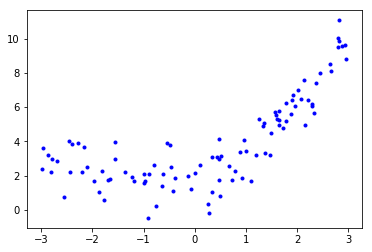

In [97]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

Clearly, a straight line will never fit this data properly. So let's use Scikit-Learn's PolynomialFeatures class to transform our training data, adding the square(2nd degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.56349666]
[-1.56349666  2.44452179]


In [99]:
X_poly[-1]
#X[-1]

array([-0.63520753,  0.4034886 ])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data:

[1.95817191] [[1.01280841 0.53968078]]


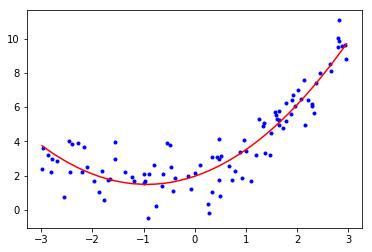

In [116]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
predictions = lin_reg.predict(X_poly)
# I put my predictor values and my response predictions in a np array (100x2)
pred_resp = np.c_[X,predictions]
# I sort them by the first column (X values)
pred_resp = pred_resp[pred_resp[:, 0].argsort()]
# extract X and preds, now ordered by X
X_s, predictions_s = pred_resp[:,0], pred_resp[:,1]
plt.plot(X, y, "b.")
plt.plot(X_s, predictions_s, "r-")
plt.show()

Not bad: the model estimates $\hat{y}$ = 0.53$x^2_1$ + 0.97$x_1$ + 1.87 when in fact the original function was y = 0.5$x^2_1$ + 1.0$x_1$ + 2.0 + Gaussian noise.

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Reg model cannot do). This is made possible by the fact that the PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two featrures a and b, Polynomial features with degree = 3 would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations ab, $a^2$b, and a$b^2$.

**caution**:

PolynomialFeatures(degree = d) transforms an array containing n features into an array containing $\frac{(n + d)!}{d!n!}$ features. Beware of the combinatorial explosion of the number of features!

### Learning Curvers

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. Of course, a high-degree Pol Reg that wiggles around to get as close as possible to the training instances, will severely overfit the training data, while the linear model will underfit it. The model that will generalize best our data is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general you won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross validation to get an estimate of a model's generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it's underfitting. This is one way to tell when a model is too simple or too complex.

Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iterations). To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    # for 1 to m 
    for m in range(1, len(X_train)):
        # we fit the model with m instances
        model.fit(X_train[:m], y_train[:m])
        # predict the model on those m training instances
        y_train_predict = model.predict(X_train[:m])
        # and on the whole validation set
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.axis([0, 80, 0, 3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "test")

Let's look at the learning curves of the plain Lin Reg model:

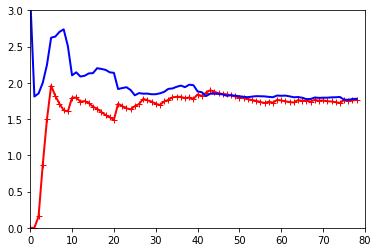

In [124]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This deserves a bit of explanation. First, let's look at the performance on the training data: when there are just one or two instances in the trainig set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. 

Now let's look at the performance of the model on the validation data. When the model is trained on a very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached a plateau: they are close and fairly high.

**Note**:

If your model is underfitting the training data, adding more trainig examples will not help. You need to use a more compex model or come up with better features.

Now let's look at the learning curves of a 10th-degree polynomial model on the same data:

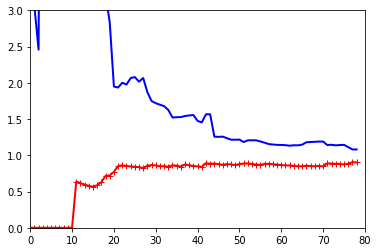

In [127]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_featyres", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:

- The error on the training data is much lower than with the Lin Reg model.
- There is a gap between the curves. This means that the model performs significantly better on the training data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

**Note**:

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

### The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:

*Bias*

     This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.(this notion of bias is not to be confused with the bias term of linear models).
     
*Variance*

     This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such an high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
     
*Irreducible error*

     This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g. fix the data sources, such as broken sensors, or detect and remove outliers).
     
Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance.

This is why it is called a tradeoff.

### Regularized Linear Models

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the model (i.e. to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weigths.

#### Ridge Regression
*Ridge Regression* (also called *Tikhonov regularization*) is a regularized version of Linear Regression: a *regularization term* equal to $\alpha \sum^n_{i = 1} \theta_{i}^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

**Note**:

It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization another reason why they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha$ = 0 then Ridge Regression is just Linear Regression. If $\alpha$ is veru large, then all weights end up very close to zero and the result is a flat line going through the data's mean. This equation presents the Ridge Regression cost function:

$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum^n_{i = 1} \theta_{i}^2$$

Note that the bias term $\theta_{0}$ is not regularized (the sum starts at i = 1). 
If we define w as the vector of feature weights ($\theta_{1}$ to $\theta_{n}$), then the regularization term is simply equal to $\frac{1}{2}( \parallel$ w $\parallel_{2})^2$, where $\parallel$ w $\parallel_{2}$ represents the $\ell_2$ norm of the weigthed vector. For Gradient Descent, just add $\alpha w$ to the MSE gradient vector.

**Caution**:

It is important to scale the data (e.g. using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

As with Lin Regr, we can perform Ridge Regr either by computing a closed-form equation or by performing GD. The pros and cons are the same. 

This equation shows the closed-form solution (where A is the (n + 1) x (n + 1) *identity matrix* except with a 0 in the top-left cell, corresponding to the bias term.

$$ \hat{\theta} = (X^TX + \alpha A)^{-1} X^T y$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution:

In [136]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.20454237]])

And using SGD:

In [141]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.47251648])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm or the weight vector: this is simply Ridge Regression.

#### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (Simple called *Lasso Regression*) is another regularized version of Linear regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm:

$$ J(\theta) = MSE(\theta) + \alpha \sum^n_{i = 1} \mid \theta_{i} \mid$$

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e. set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a *sparse model* (i.e. with few nonzero feature weights).

The lasso cost function is not differentiable at $\theta_{i}$ = 0 (for i = 1, 2, ..., n), but Gradient Descent still works fine if you use a *subgradient vector* g instead when any $\theta_{i}$ = 0.

Here is a small Scikit-Learn example using the Lasso class. Note that you could instead use a SGDRegressor(penalty = "l1").

In [142]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.16837134])

#### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ration with r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, Elastic Net is equivalent to Lasso Regression:

$$ J(\theta) = MSE(\theta) + r \alpha \sum^n_{i = 1} \mid \theta_{i} \mid + \frac{1 - r}{2} \alpha \sum^n_{i = 1} \theta_{i}^2 $$

So when should you use plain Lin Reg (i.e. w/o any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Lin Reg. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example using Scikit-Learn's ElasticNet (l1_ratio corresponds to the mix ratio r):

In [143]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.16786945])

#### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*.

For example, a complex model trained using Batch Gradient Descent will learn as the epochs go by and its prediction error (RMSE) on the training set naturally goes down and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. 

**Note**:

With Stochastic and Mini Batch the validation and training set error curves are not so smooth so it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back at the model parameters to the point where the validation error was at the minimum.

Here is a basic implementation of early stopping:

In [168]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
# prepare the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
sgd_reg.fit(X_train_poly_scaled, y_train.ravel())

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### Logistic Regression

As we discussed in Chapter 1, some regression algorithms can be used for classification as well (and vice versa). *Logistic Regression* (also called *Logit Regression*) is commonly used to estimate the probability that an instance belongs to a particular class (e.g. what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not (i.e. it belongs to the negative class, labeled "0"). This makes it a binary classifier.

#### Estimating Probabilities

So how does it work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result:

$$\hat{p} = h_\theta (x) = \sigma (x^T\theta)$$

The logistic - noted $\sigma(.)$ - is a *sigmoid function* (i.e. S-shapred) that outputs a number between 0 and 1. It is defined as:

$$ \sigma(t) = \frac{1}{1 + exp(-t)}$$

Once the Logistic Regression model has estimated the probability $\hat{p} = h_\theta (x)$ that an instance x belongs to the positive class, it can make its prediction $\hat(y)$ easily: if this probability is above 0.5 the instance will belong to class 1, otherwise to class 0.

Notice that $\sigma(t)$ < 0.5 when t < 0 and $\sigma(t)$ $\geq$ 0.5 when t $\geq$ 0, so a Logistic Regression model predicts 1 if $x^T\theta$ is positive, and 0 if it is negative.

**Note**:

The score t is often called the *logit*: this name comes from the fact that the logit funciton, defined as logit(p) = log(p / (1 - p)), is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability p, you will find that the result is t. The logit is also called the *log-odds*, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

#### Training and Cost function

Good, now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This idea is captured by the cost function below for a single training instance x:

$$ c(\theta) =  \lbrace -log(\hat{p}) \mspace{10mu} if \mspace{6mu}y = 1; -log(1 - \hat{p}) \mspace{10mu} if \mspace{6mu} y = 0 \rbrace$$

This cost function makes sense because -log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a prob close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a nevative instance. On the other hand, -log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression called the log loss:

$$ J(\theta) = -\frac{1}{m} \sum^m_{i = 1} \lceil y^{(i)}log(\hat{p}^{(i)}) + (1 - \hat{y}^{(i)})log(1 - \hat{p}^{(i)})\rceil $$

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regards to the jth model paramete $\theta_{j}$ is given by:

$$ \frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m} \sum^m_{i = 1} (\sigma(\theta^Tx^{(i)}) - y^{(i)})x^{(i)}_{j}$$

This equation computes for each instance the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm. That's it: you now know how to train a Logistic Regression model. For Stochastic GD you would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

#### Decision Boundaries

Let's use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let's try to build a classifier to detect the Iris-Vriginica type based only on the petal width feature. First let's load the data:

In [173]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Now let's train a Log Regr model:

In [174]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\levka\Anaconda3\envs\ds001\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's look at the model's estimated probabilities for flowers with petal width varying from 0 to 3 cm:

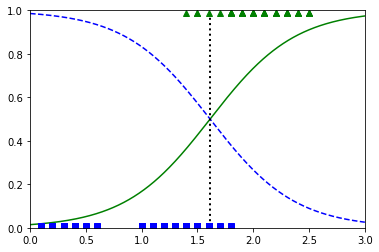

In [187]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris-Virginica")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X[y==0], y[y==0] + 0.01, "bs")
plt.plot(X[y==1], y[y==1] - 0.01, "g^")
plt.axis([0.0, 3.0, 0.0, 1.0])
plt.show()


The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above 2 cm the classifier is highly confident that the flower is an Iris-Virginica (high prob for the "Not Iris-Virginica" class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely. Therefore, there is a *decision boundary* at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm the classifier will predict that the flower is an Iris-Virginica, or esle it will predict that it is not (even if it is not very confident):

In [188]:
log_reg.predict([[1.7],[1.5]]) # values close to the decision boundary

array([1, 0])

**Note**:

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

### Softmax Regression

The Logistic Regression model can be generalized to support multiple clases directly, without having to train and combine multiple binary classifiers. This is called *Softmax Regression* or *Multinomial Logistic Regression*.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score $s_{k}(x)$ for each class k, then estimates the probability of each class by applying the *softmax function* (also called the *normalized exponential*) to the scores. The equation to compute $s_{k}(x)$ should look familiar, as it is just like the equation for Linear Regression prediction:

$$s_{k}(x) = x^T\theta^{(k)}$$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a *parameter matrix* $\Theta$.

Once you have computed the score of every clas for the instance x, you can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function:

$$ \hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j = 1}^Kexp(s_j(x))}$$

- K is the number of classes
- s(x) is a vector containing the scores of each class for the instance x
- $\sigma(s(x))$ is the estimated probability that the instance belongs to class k given the scores of each class for that instance.

It computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Just like the Logisti Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

$$ \hat{y} = \underset{k}{\operatorname{argmax}} \sigma(s(x))_k =  \underset{k}{\operatorname{argmax}} s_k(x) =  \underset{k}{\operatorname{argmax}} ((\theta^{(k)})^Tx)$$

- The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma(s(x))_k$.

**Note**:

The Softmax Regression classifier predicts only one class at a time (i.e. it is multiclass, not multioutput) so it should be used only with **mutually exclusive** classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let's take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown below called the *cross entropy*, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes (we will use it again several times in the following chapters).

$$J(\Theta) = -\frac{1}{m}\sum_{i = 1}^m\sum_{k = 1}^K y_k^{(i)}log(\hat{p}_k^{(i)})$$

- $y_k^{(i)}$ is the target probability that the ith instance belongs to class k. In general it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes (K = 2) this cost function is equivalent to the Logistic Regression's cost function (log loss).


**Cross Entropy**

Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using 3 bits since $2^3$ = 8. However, if you think it will be sunny almost every day, it would be much more efficient to code "sunny" on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross entropy will just be equal to the entropy of the weather (i.e. its intrinsic unpredictability). But if your assumptions are wrong (e.g. if it rains often), cross entropy will be greater by an amount called the *Kullback-Leibler divergence*.

The cross entropy between two probability distribution p and q is defined as $H(p,q) = -\sum_{i = 1}^m(p(x)log q(x)$ (at least when the distributions are discrete).


THe gradient vector of this cost function with regards to $\theta^k$ is:

$$\nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i = 1}^m(\hat{p}^{(i)}_k - y^{(i)}_k)x^{(i)}  $$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function.

Let's use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn's LogisticRegression uses one-versus all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver. It also applies $\ell_2$ regularization by default, which you can control using the hyperparameter C.

In [191]:
print(iris["data"][:5])
X = iris["data"][:, (2,3)] # petal length, petal width
print(X[:5])
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2) with 94.2% probability (or Iris-Versicolor with 5.8% probability):

In [192]:
softmax_reg.predict([[5,2]])

array([2])

In [193]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])